<a href="https://colab.research.google.com/github/antussa2016/thesis_work/blob/master/model/R_Q_A_and_Tweets_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import ast
import json

In [3]:
df = pd.read_csv('/content/drive/MyDrive/test_model_01.csv')

# **remove duplicates**

In [ ]:
# df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   encoded_data  1247 non-null   object 
 1   Reputation    1247 non-null   float64
 2   Question      1247 non-null   float64
 3   Answer        1247 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.1+ KB


In [5]:
df['encoded_data'].describe()

count                                                  1247
unique                                                  803
top       [-7.20829546e-01 -2.91609019e-01 -1.33424237e-...
freq                                                      4
Name: encoded_data, dtype: object

In [6]:
df['encoded_data'] = df['encoded_data'].str.replace('\n', '')

In [7]:
df['encoded_data']  = df['encoded_data'] .str.split().str.join(" ")

In [8]:
df['encoded_data'] = df['encoded_data'].str.strip('[]').str.split()

In [9]:
print (type(df.loc[0, 'encoded_data'][0]))

<class 'str'>


In [ ]:
# df.encoded_values.str.strip("[]").str.split(", ", expand=True, regex=False).astype(float)

In [10]:
df['encoded_data'] = df['encoded_data'].apply(lambda x: [float(y) for y in x])

df['encoded_data'] = [[float(y) for y in x] for x in df['encoded_data']]

In [11]:
print (type(df.loc[0, 'encoded_data'][0]))

<class 'float'>


In [12]:
df['encoded_data']

0       [-0.69729674, -0.42765418, -0.661093, 0.551479...
1       [-0.69729674, -0.42765418, -0.661093, 0.551479...
2       [-0.773091733, -0.356368035, -0.886602938, 0.6...
3       [-0.769801915, -0.330034107, -0.247532338, 0.5...
4       [-0.703908861, -0.390216738, -0.439860642, 0.5...
                              ...                        
1242    [-0.715716422, -0.363797963, -0.362285972, 0.4...
1243    [-0.715716422, -0.363797963, -0.362285972, 0.4...
1244    [-0.6868242, -0.50442165, -0.6755025, 0.595654...
1245    [-0.718400359, -0.278013349, 0.0317952782, 0.4...
1246    [-0.718400359, -0.278013349, 0.0317952782, 0.4...
Name: encoded_data, Length: 1247, dtype: object

# **To reshape**

In [13]:
x = np.array(df['encoded_data'].tolist())

# check the shape of the resulting array
print(x.shape)

(1247, 768)


In [ ]:
# y = np.array(df['Reputation'].tolist())

In [ ]:
# df2 = pd.DataFrame(df['encoded_values'].tolist(), index=df.index).astype(float).join(df[['encoded_values','Reputation']])

In [ ]:
# df.explode('encoded_values').astype({'encoded_values':float})

In [ ]:
# df = df.drop(columns=['Question', 'Answer'])

In [14]:
from sklearn.model_selection import train_test_split

In [42]:
# x = df.drop('Reputation', axis=1)
y = df['Answer']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)

In [17]:
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (997, 768)
X_test shape: (250, 768)
y_train shape: (997,)
y_test shape: (250,)


In [ ]:
len(x_test)

250

In [ ]:
x_train[0].shape

(768,)

# **Feedforward Model**

In [47]:
model = Sequential([
    keras.layers.Dense(64, input_shape=(768,), activation='relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(1, activation='linear')

])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=50,batch_size=32,verbose=1)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 0.0726 - val_loss: 0.0415
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.0341
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.0427
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0484 - val_loss: 0.0639
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.0355
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0329
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0422 - val_loss: 0.0337
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0345
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.0402
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.0430
Epoch 11/50
32/32 [

In [45]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.025724113955926886

# **Evaluate the model**

In [ ]:
# @title
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

In [ ]:
# @title
prediction = model.predict(x_test)

In [ ]:
# @title
prediction[:50]

In [ ]:
# @title
y_test[:50]

In [ ]:
# @title
y_pred = []
for element in prediction:
    if element > 0.9:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
# @title
y_pred[:25]

In [ ]:
# @title
Y_test = []
for i in y_test:
    if i> 0.9:
        Y_test.append(1)
    else:
        Y_test.append(0)

In [ ]:
# @title
Y_test[:50]

# **COnfusion Matric**

In [ ]:
# @title
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, classification_report

In [ ]:
# @title
cm = confusion_matrix(Y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1'])

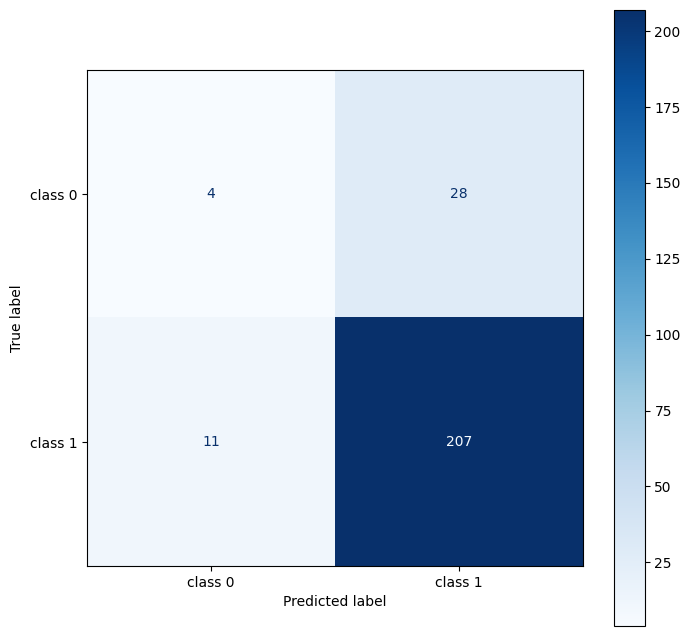

In [ ]:
# @title
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax, cmap='Blues')
plt.show()

In [ ]:
# @title
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.12      0.17        32
           1       0.88      0.95      0.91       218

    accuracy                           0.84       250
   macro avg       0.57      0.54      0.54       250
weighted avg       0.80      0.84      0.82       250



# **Building 1DCNN Model**



In [39]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768, 1)))# add 1D convolutional layer
model.add(MaxPooling1D(pool_size=2))# add max pooling layer
model.add(Flatten())# add flatten layer
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))# add dense layer
model.add(Dense(1, activation='linear'))# add output layer
model.compile(optimizer='adam', loss='mean_squared_error')  # compile the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
32/32 [==============================] - 5s 108ms/step - loss: 0.1109
Epoch 2/100
32/32 [==============================] - 3s 106ms/step - loss: 0.0144
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.0140
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0138
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0158
Epoch 6/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0136
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0148
Epoch 8/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0127
Epoch 9/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0131
Epoch 10/100
32/32 [==============================] - 1s 39ms/step - loss: 0.0167
Epoch 11/100
32/32 [==============================] - 2s 52ms/step - loss: 0.0173
Epoch 12/100
32/32 [==============================] - 2s 67ms/step - loss: 0.0125
Epoch 13/100
32/32 [===

In [40]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 14ms/step


In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.21240840024763996

# **LSTM Model building**

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))

In [ ]:
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, 768)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 5ms/step - loss: 0.3563 - accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3253 - accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.0000e+00
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.0000e+00
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.0000e+00
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3243 - 

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.0040


# **Accuracy for reputation** 0.4%

FFNN.......  0.0040

1DCNN...... 0.0040

LSTM.....  0.0040


# **Accuracy for question** 8.8%

FFNN....... 0.0880

1DCNN...... 0.0880

LSTM.....   0.0880

# **Accuracy for Answer** 86%

FFNN....... 0.8600

1DCNN...... 0.8600

LSTM..... 0.8600
